In [33]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams['font.size'] = 7
# rcParams['pdf.fonttype'] = 42
# rcParams['ps.fonttype'] = 42
# rcParams['svg.fonttype'] = 'none'


path_figures=Path().cwd().parent.parent/"figures"
path_figures.mkdir(parents=True, exist_ok=True)
path_benchmark_data=Path.cwd().parent.parent/"benchmark_for_test"
path_benchmark_data.mkdir(parents=True, exist_ok=True)

In [34]:
steps=[
    "build", 
    "update"]
original_library_size=[1_000, 10_000, 100_000, 1_000_000, 2_000_000, 10_000_000, 100_000_000]
add_size=100

search_type="hybrid"
ion_mode=[-1,1]


In [35]:
df=[]
for s in steps:
    for library_size in original_library_size:
        for charge in ion_mode:
            data={"library_number":library_size,"add_size":add_size, "step":s, 'charge':charge}
            try:
                path_benchmark_dynamic=path_benchmark_data/f"dynamic_fast_update_{charge}_{add_size}_added_to_{library_size}_memory_usage_{s}_step_{search_type}_options_library_size.txt"
                
                with open(path_benchmark_dynamic,"r") as f1:
                        for line in f1.readlines():
                            items=line.split(":", maxsplit=1)
                            key, value=items
                            if key.strip()=="Maximum resident set size (kbytes)":
                                dynamic=int(value.strip())

                data["dynamic_entropy_search(fast_update_mode)"]=dynamic/1048576
            except:
                data["dynamic_entropy_search(fast_update_mode)"]=None

            try:
                path_benchmark_flash=path_benchmark_data/f"flash_{charge}_{add_size}_added_to_{library_size}_memory_usage_{s}_step_{search_type}_options_library_size.txt"
                with open(path_benchmark_flash,"r") as f1:
                    for line in f1.readlines():
                        items=line.split(":", maxsplit=1)
                        key, value=items
                        if key.strip()=="Maximum resident set size (kbytes)":
                            flash=int(value.strip())
                data["flash_entropy_search"]=flash/1048576
            except:
                data["flash_entropy_search"]=None

            try:
                path_benchmark_masstp=path_benchmark_data/f"masstplus_{charge}_{add_size}_added_to_{library_size}_memory_usage_{s}_step_{search_type}_options_library_size.txt"
                with open(path_benchmark_masstp,"r") as f1:
                    for line in f1.readlines():
                        items=line.split(":", maxsplit=1)
                        key, value=items
                        if key.strip()=="Maximum resident set size (kbytes)":
                            masstp=int(value.strip())
                data["masstplus"]=masstp/1048576
            except:
                data["masstplus"]=None

            df.append(pd.DataFrame([data]))
             
df=pd.concat(df)
df


/tmp/ipykernel_1223201/535381561.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df=pd.concat(df)


,library_number,add_size,step,charge,dynamic_entropy_search(fast_update_mode),flash_entropy_search,masstplus
0,1000,100,build,-1,0.034737,0.481091,0.011856
0,1000,100,build,1,0.037384,0.471039,0.015919
0,10000,100,build,-1,0.071247,0.527126,0.054489
0,10000,100,build,1,0.100842,0.557861,0.088310
0,100000,100,build,-1,0.463284,0.993126,0.470650
0,100000,100,build,1,0.775013,1.310471,0.858994
0,1000000,100,build,-1,3.897430,4.794796,7.977768
0,1000000,100,build,1,6.739189,7.424763,13.661411
0,2000000,100,build,-1,6.015854,9.224358,16.951363
0,2000000,100,build,1,10.390781,14.485447,32.807663


In [36]:

df_data = df[["library_number", 
              "charge",
              "step",
            "dynamic_entropy_search(fast_update_mode)", 
            "flash_entropy_search",
            "masstplus"]]

df_melted=df_data.melt(id_vars=["charge", "step", "library_number"], var_name="type", value_name="memory_usage")
df_melted    


,charge,step,library_number,type,memory_usage
0,-1,build,1000,dynamic_entropy_search(fast_update_mode),0.034737
1,1,build,1000,dynamic_entropy_search(fast_update_mode),0.037384
2,-1,build,10000,dynamic_entropy_search(fast_update_mode),0.071247
3,1,build,10000,dynamic_entropy_search(fast_update_mode),0.100842
4,-1,build,100000,dynamic_entropy_search(fast_update_mode),0.463284
...,...,...,...,...,...
79,1,update,2000000,masstplus,2.164219
80,-1,update,10000000,masstplus,NaN
81,1,update,10000000,masstplus,NaN
82,-1,update,100000000,masstplus,NaN


/tmp/ipykernel_1223201/3634981022.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_charge['log_library_number'] = np.log10(df_charge['library_number'])


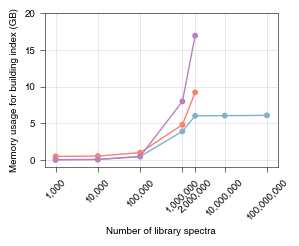

In [37]:
charge=-1
step="build"
df_charge=df_melted[(df_melted["charge"]==charge) & (df_melted["step"]==step)]


# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update_mode)": color_palette_set2[4],
    "flash_entropy_search": color_palette_set2[3],
    "masstplus": color_palette_set2[-3],
}
fig, ax = plt.subplots(figsize=(3, 2))

ax.tick_params(which="both", width=0.4)          
for spine in ax.spines.values():  
    spine.set_linewidth(0.4)

df_charge['log_library_number'] = np.log10(df_charge['library_number'])
library_sizes = sorted(df_charge['library_number'].unique())
log_library_sizes = np.log10(library_sizes)
sns.scatterplot(x="log_library_number", y="memory_usage", hue="type", data=df_charge, 
            palette=color_palette, size=1, alpha=1, legend=False, zorder=5, edgecolors='none')



sns.lineplot(x="log_library_number", y="memory_usage", hue="type", data=df_charge, 
            palette=color_palette, estimator=np.median, errorbar=None, linewidth=1, zorder=5, legend=False)

plt.xticks(log_library_sizes, [f"{size:,.0f}" for size in library_sizes])
# plt.yscale("log")



# Add grid
plt.grid(True, which="both", ls="-", alpha=0.5, zorder=1, linewidth=0.4)

# Set y-axis title
plt.ylabel(f"Memory usage for building index (GB)")

plt.xticks(rotation=45)
plt.ylim(top=20, bottom=-1)

if charge==-1:
    mode="-"
elif charge==1:
    mode='+'

plt.xlabel(f"Number of library spectra")

# Change legend
# handles, labels = ax.get_legend_handles_labels()
# legend_dict = {l: h for h, l in zip(handles, labels)}
# labels_new = ["Dynamic Entropy Search", "Flash Entropy Search", "MASST+"]
# handles_new = [legend_dict[l] for l in ["dynamic_entropy_search(fast_update_mode)", "flash_entropy_search", "masstplus"]]
# ax.legend(handles_new, labels_new, frameon=False, loc="upper left", markerscale=4, bbox_to_anchor=(1, 0.65))
# Move legend to the top
# ax.legend(handles_new, labels_new, frameon=False, loc="upper center",ncol=2, bbox_to_anchor=(0.4, 1.25))

# Save figure
plt.savefig(path_figures / f"memory_usage_different_library_scale_{step}_step_{charge}_options_library_size.svg", bbox_inches="tight", dpi=1200)

/tmp/ipykernel_1223201/3803625770.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_charge['log_library_number'] = np.log10(df_charge['library_number'])


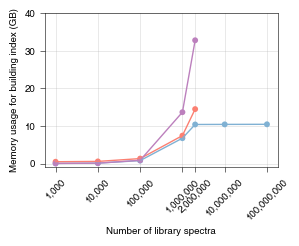

In [38]:
charge=1
step="build"
df_charge=df_melted[(df_melted["charge"]==charge) & (df_melted["step"]==step)]


# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update_mode)": color_palette_set2[4],
    "flash_entropy_search": color_palette_set2[3],
    "masstplus": color_palette_set2[-3],
}
fig, ax = plt.subplots(figsize=(3, 2))

ax.tick_params(which="both", width=0.4)          
for spine in ax.spines.values():  
    spine.set_linewidth(0.4)

df_charge['log_library_number'] = np.log10(df_charge['library_number'])
library_sizes = sorted(df_charge['library_number'].unique())
log_library_sizes = np.log10(library_sizes)
sns.scatterplot(x="log_library_number", y="memory_usage", hue="type", data=df_charge, 
            palette=color_palette, size=1, alpha=1, legend=False, zorder=5, edgecolors='none')


sns.lineplot(x="log_library_number", y="memory_usage", hue="type", data=df_charge, 
            palette=color_palette, estimator=np.median, errorbar=None, linewidth=1, zorder=5, legend=False)

plt.xticks(log_library_sizes, [f"{size:,.0f}" for size in library_sizes])
# plt.yscale("log")



# Add grid
plt.grid(True, which="both", ls="-", alpha=0.5, zorder=1, linewidth=0.4)

# Set y-axis title
plt.ylabel(f"Memory usage for building index (GB)")

plt.xticks(rotation=45)
plt.ylim(top=40, bottom=-1)

if charge==-1:
    mode="-"
elif charge==1:
    mode='+'

plt.xlabel(f"Number of library spectra")

# Change legend
# handles, labels = ax.get_legend_handles_labels()
# legend_dict = {l: h for h, l in zip(handles, labels)}
# labels_new = ["Dynamic Entropy Search", "Flash Entropy Search", "MASST+"]
# handles_new = [legend_dict[l] for l in ["dynamic_entropy_search(fast_update_mode)", "flash_entropy_search", "masstplus"]]
# ax.legend(handles_new, labels_new, frameon=False, loc="upper left", markerscale=4, bbox_to_anchor=(1, 0.65))
# Move legend to the top
# ax.legend(handles_new, labels_new, frameon=False, loc="upper center",ncol=2, bbox_to_anchor=(0.4, 1.25))

# Save figure
plt.savefig(path_figures / f"memory_usage_different_library_scale_{step}_step_{charge}_options_library_size.svg", bbox_inches="tight", dpi=1200)

/tmp/ipykernel_1223201/3464961207.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_charge['log_library_number'] = np.log10(df_charge['library_number'])


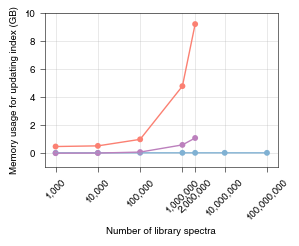

In [39]:
charge=-1
step="update"
df_charge=df_melted[(df_melted["charge"]==charge) & (df_melted["step"]==step)]


# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update_mode)": color_palette_set2[4],
    "flash_entropy_search": color_palette_set2[3],
    "masstplus": color_palette_set2[-3],
}
fig, ax = plt.subplots(figsize=(3, 2))

ax.tick_params(which="both", width=0.4)          
for spine in ax.spines.values():  
    spine.set_linewidth(0.4)

df_charge['log_library_number'] = np.log10(df_charge['library_number'])
library_sizes = sorted(df_charge['library_number'].unique())
log_library_sizes = np.log10(library_sizes)
sns.scatterplot(x="log_library_number", y="memory_usage", hue="type", data=df_charge, 
            palette=color_palette, size=1, alpha=1, legend=False, zorder=5, edgecolors='none')


sns.lineplot(x="log_library_number", y="memory_usage", hue="type", data=df_charge, 
            palette=color_palette, estimator=np.median, errorbar=None, linewidth=1, zorder=5, legend=False)

plt.xticks(log_library_sizes, [f"{size:,.0f}" for size in library_sizes])
# plt.yscale("log")



# Add grid
plt.grid(True, which="both", ls="-", alpha=0.5, zorder=1, linewidth=0.4)

# Set y-axis title
plt.ylabel(f"Memory usage for updating index (GB)")

plt.xticks(rotation=45)
plt.ylim(top=10, bottom=-1)
if charge==-1:
    mode="-"
elif charge==1:
    mode='+'

plt.xlabel(f"Number of library spectra")


# Change legend
# handles, labels = ax.get_legend_handles_labels()
# legend_dict = {l: h for h, l in zip(handles, labels)}
# labels_new = ["Dynamic Entropy Search", "Flash Entropy Search", "MASST+"]
# handles_new = [legend_dict[l] for l in ["dynamic_entropy_search(fast_update_mode)", "flash_entropy_search", "masstplus"]]
# ax.legend(handles_new, labels_new, frameon=False, loc="upper left", markerscale=4, bbox_to_anchor=(1, 0.65))
# Move legend to the top
# ax.legend(handles_new, labels_new, frameon=False, loc="upper center",ncol=2, bbox_to_anchor=(0.4, 1.25))

# Save figure
plt.savefig(path_figures / f"memory_usage_different_library_scale_{step}_step_{charge}_options_library_size.svg", bbox_inches="tight", dpi=1200)

/tmp/ipykernel_1223201/3325038580.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_charge['log_library_number'] = np.log10(df_charge['library_number'])


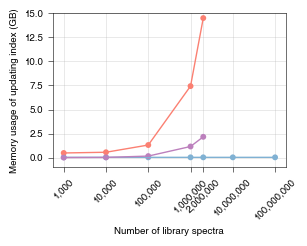

In [ ]:
charge=1
step="update"
df_charge=df_melted[(df_melted["charge"]==charge) & (df_melted["step"]==step)]


# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update_mode)": color_palette_set2[4],
    "flash_entropy_search": color_palette_set2[3],
    "masstplus": color_palette_set2[-3],
}
fig, ax = plt.subplots(figsize=(3, 2))

ax.tick_params(which="both", width=0.4)          
for spine in ax.spines.values():  
    spine.set_linewidth(0.4)

df_charge['log_library_number'] = np.log10(df_charge['library_number'])
library_sizes = sorted(df_charge['library_number'].unique())
log_library_sizes = np.log10(library_sizes)
sns.scatterplot(x="log_library_number", y="memory_usage", hue="type", data=df_charge, 
            palette=color_palette, size=1, alpha=1, legend=False, zorder=5, edgecolors='none')


sns.lineplot(x="log_library_number", y="memory_usage", hue="type", data=df_charge, 
            palette=color_palette, estimator=np.median, errorbar=None, linewidth=1, zorder=5, legend=False)

plt.xticks(log_library_sizes, [f"{size:,.0f}" for size in library_sizes])
# plt.yscale("log")



# Add grid
plt.grid(True, which="both", ls="-", alpha=0.5, zorder=1, linewidth=0.4)

# Set y-axis title
plt.ylabel(f"Memory usage for updating index (GB)")

plt.xticks(rotation=45)
plt.ylim(top=15, bottom=-1)
if charge==-1:
    mode="-"
elif charge==1:
    mode='+'

plt.xlabel(f"Number of library spectra")


# Change legend
# handles, labels = ax.get_legend_handles_labels()
# legend_dict = {l: h for h, l in zip(handles, labels)}
# labels_new = ["Dynamic Entropy Search", "Flash Entropy Search", "MASST+"]
# handles_new = [legend_dict[l] for l in ["dynamic_entropy_search(fast_update_mode)", "flash_entropy_search", "masstplus"]]
# ax.legend(handles_new, labels_new, frameon=False, loc="upper left", markerscale=4, bbox_to_anchor=(1, 0.65))
# Move legend to the top
# ax.legend(handles_new, labels_new, frameon=False, loc="upper center",ncol=2, bbox_to_anchor=(0.4, 1.25))

# Save figure
plt.savefig(path_figures / f"memory_usage_different_library_scale_{step}_step_{charge}_options_library_size.svg", bbox_inches="tight", dpi=1200)